In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.7958 - loss: 0.6373 - val_accuracy: 0.9808 - val_loss: 0.0624
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.9672 - loss: 0.1084 - val_accuracy: 0.9850 - val_loss: 0.0443
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9758 - loss: 0.0814 - val_accuracy: 0.9876 - val_loss: 0.0396
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9816 - loss: 0.0626 - val_accuracy: 0.9894 - val_loss: 0.0319
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 92ms/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9882 - val_loss: 0.0321


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0394
Test Accuracy: 98.82%


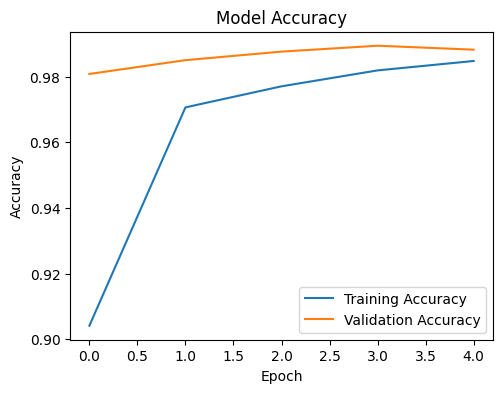

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

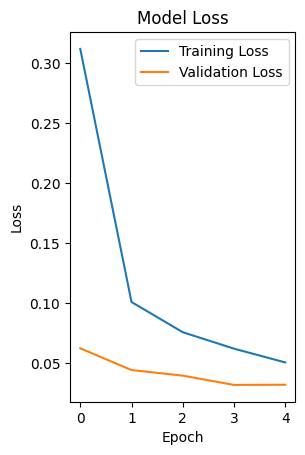

In [10]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
model.save('handwritten_character_recognition_model.h5')